# Exploring Missing Values

### 📘 Notebook Overview: Missing Data Exploration

This notebook focuses on understanding and handling missing data in the Adult Census dataset. It includes steps to restructure the data, analyze missing patterns, and make informed decisions on how to handle them. The following sections are covered:

---

### ▪️ Combine Given Train and Test data and Re-split the data into new 80% Trainset and 20% Testset  
To perform a unified and consistent missing data analysis, the original train and test sets were merged and then randomly split into a new 80/20 train-test ratio.

### ▪️ Checking Number of Missing Values  
Check number of missing values for each column.

### ▪️ Checking Missing Data Pattern  
Visual tools such as nullity matrix and missingness heatmap were used to analyze the structure of missing data and detect dependencies between features. This helped assess whether data is missing at random or not.

### ▪️ Drop Rows which contain NaN values in native_country column  
Based on the observed patterns, rows with missing values in the `native_country` column were dropped due to their low frequency and lack of correlation with other missing features.

---


## Combine Given Train and Test data and Re-split the data into new 80% Trainset and 20% Testset

### Combining Original Train and Test Data

When reviewing the original datasets, I noticed that the **test set was nearly 50% the size of the training set**.  
In typical machine learning workflows, it is preferable for the training set to be much larger than the test set, as **more training data usually helps the model learn better and generalize more effectively**.

To address this, I decided to **combine the original training and testing datasets** into a single dataset.  
After combining, I **re-split the data into a new 80% training set and 20% test set** using `train_test_split()`.

Additionally, I used the parameter `stratify=combined_df['income']` during the split to **preserve the original class distribution** between the training and testing subsets.  
This ensures that both sets have a similar proportion of classes, which is important especially when dealing with **imbalanced classification tasks**.

By doing this, I increased the amount of data available for model training while maintaining a reliable and fair evaluation setup.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the original cleaned datasets
train_df = pd.read_csv("adult_train.csv")
test_df = pd.read_csv("adult_test.csv")

# Step 2: Combine the datasets
combined_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# Step 3: Split into 80% training and 20% testing (with stratification on 'income')
train_80, test_20 = train_test_split(
    combined_df,
    test_size=0.2,
    random_state=42,
    stratify=combined_df['income']  # preserves class distribution
)

# Step 4: Save the new splits to CSV files
train_80.to_csv("adult_combined_train_80.csv", index=False)
test_20.to_csv("adult_combined_test_20.csv", index=False)

# Optional: Print confirmation
print(f"Combined dataset split into:")
print(f" - Train: {train_80.shape[0]} samples saved to 'adult_combined_train_80.csv'")
print(f" - Test:  {test_20.shape[0]} samples saved to 'adult_combined_test_20.csv'")

Combined dataset split into:
 - Train: 39072 samples saved to 'adult_combined_train_80.csv'
 - Test:  9769 samples saved to 'adult_combined_test_20.csv'


## Checking Number of Missing Values

In [2]:
train_df = pd.read_csv("adult_combined_train_80.csv")

# Basic info
print("\nTraining Data Info:")
train_df.info()

print("\nMissing values in training data:")
print(train_df.isnull().sum())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39072 entries, 0 to 39071
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39072 non-null  int64 
 1   workclass       36840 non-null  object
 2   fnlwgt          39072 non-null  int64 
 3   education       39072 non-null  object
 4   education_num   39072 non-null  int64 
 5   marital_status  39072 non-null  object
 6   occupation      36832 non-null  object
 7   relationship    39072 non-null  object
 8   race            39072 non-null  object
 9   sex             39072 non-null  object
 10  capital_gain    39072 non-null  int64 
 11  capital_loss    39072 non-null  int64 
 12  hours_per_week  39072 non-null  int64 
 13  native_country  38379 non-null  object
 14  income          39072 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.5+ MB

Missing values in training data:
age                  0
workclass      

In [3]:
test_df = pd.read_csv("adult_combined_test_20.csv")

# Basic info
print("\nTraining Data Info:")
test_df.info()

print("\nMissing values in training data:")
print(test_df.isnull().sum())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9769 non-null   int64 
 1   workclass       9202 non-null   object
 2   fnlwgt          9769 non-null   int64 
 3   education       9769 non-null   object
 4   education_num   9769 non-null   int64 
 5   marital_status  9769 non-null   object
 6   occupation      9200 non-null   object
 7   relationship    9769 non-null   object
 8   race            9769 non-null   object
 9   sex             9769 non-null   object
 10  capital_gain    9769 non-null   int64 
 11  capital_loss    9769 non-null   int64 
 12  hours_per_week  9769 non-null   int64 
 13  native_country  9605 non-null   object
 14  income          9769 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB

Missing values in training data:
age                 0
workclass         

## Checking Missing Data Pattern

### 🔍 Missing Data Exploration Procedure

To understand the pattern and structure of missing values in the dataset, I followed a step-by-step exploratory approach:

1. **Visualize with Nullity Matrix**  
   I first plotted a nullity matrix to get an overview of where the missing values occur across all columns. This helped me visually identify which features contain missing values and how those missing values are distributed across the dataset.

2. **Sort Nullity Matrix**  
   I sorted the nullity matrix to check for any alignment of missing values between different features. This allowed me to detect possible relationships between columns with missing data — for example, if missing values tend to appear in the same rows across two or more features.

3. **Analyze with Missingness Correlation Heatmap**  
   Finally, I used a heatmap to check correlations between missingness in different features. This helped determine whether the missing values might be related and if they are likely **Missing at Random (MAR)** or **Missing Not at Random (MNAR)**.


In [4]:
# pip install missingno

🔎 DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39072 entries, 0 to 39071
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39072 non-null  int64 
 1   workclass       36840 non-null  object
 2   fnlwgt          39072 non-null  int64 
 3   education       39072 non-null  object
 4   education_num   39072 non-null  int64 
 5   marital_status  39072 non-null  object
 6   occupation      36832 non-null  object
 7   relationship    39072 non-null  object
 8   race            39072 non-null  object
 9   sex             39072 non-null  object
 10  capital_gain    39072 non-null  int64 
 11  capital_loss    39072 non-null  int64 
 12  hours_per_week  39072 non-null  int64 
 13  native_country  38379 non-null  object
 14  income          39072 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.5+ MB

📊 Total missing values per column:

age                  0
workclass     

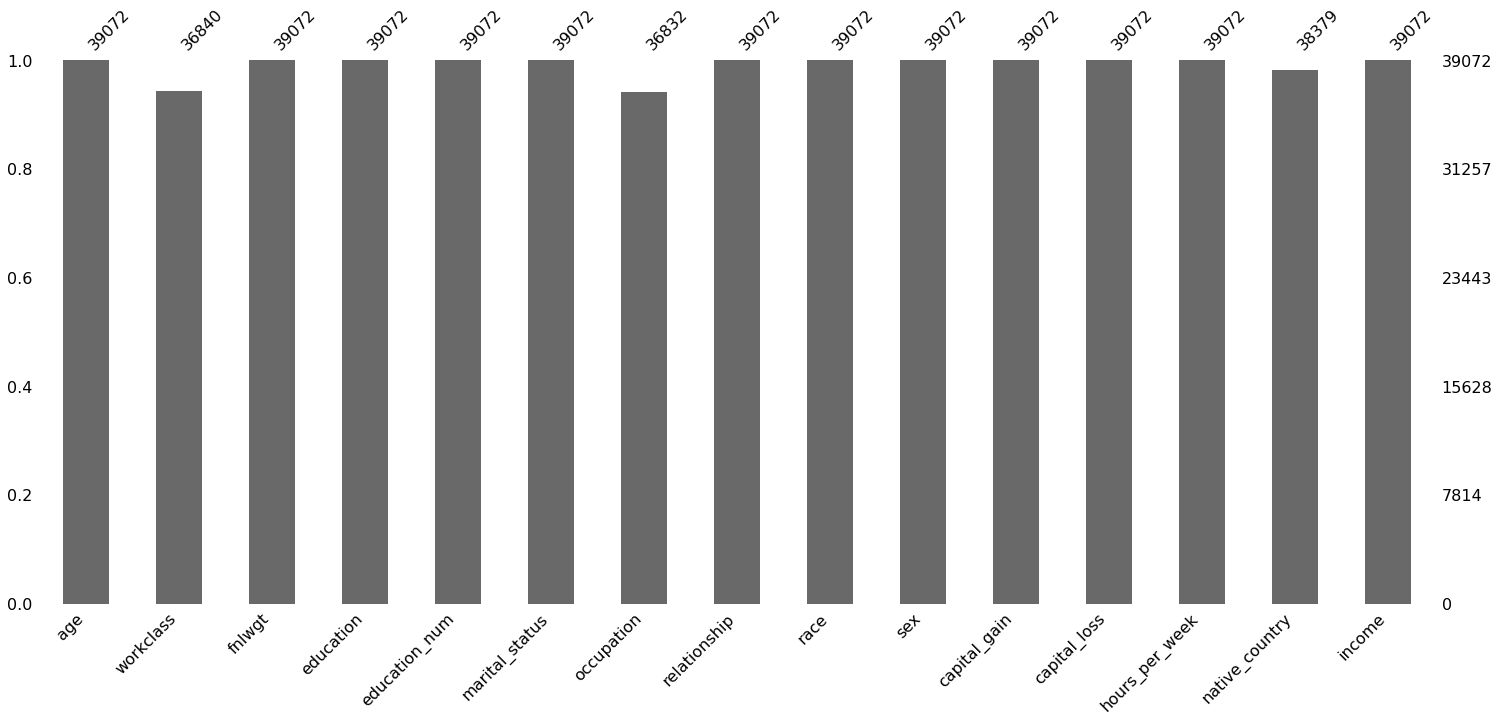

🧩 Showing Nullity Matrix...


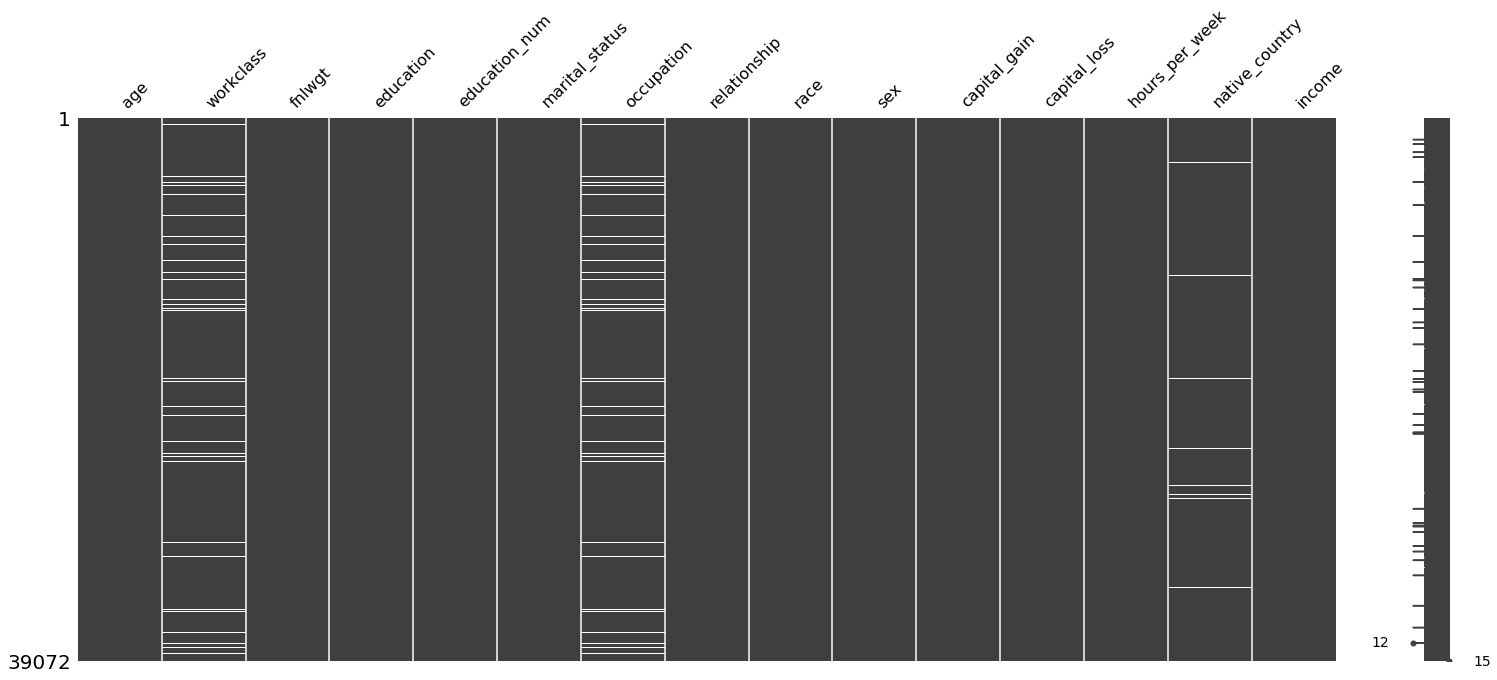

In [5]:
import pandas as pd
import missingno as msno  # If not installed, run: pip install missingno
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('adult_combined_train_80.csv')

# 1. View basic structure
print("🔎 DataFrame info:\n")
df.info()

# 2. Create a Nullity DataFrame (True = missing, False = not missing)
null_df = df.isnull()

# 3. Total missing values per column
print("\n📊 Total missing values per column:\n")
print(null_df.sum())

# 4. Percentage of missingness per column
print("\n📈 Percentage of missingness per column:\n")
print((null_df.mean() * 100).round(2))

# 5. Visualize with a Nullity Bar
print("\n📉 Showing Nullity Bar Plot...")
msno.bar(df)
plt.show()

# 6. Visualize with a Nullity Matrix
print("🧩 Showing Nullity Matrix...")
msno.matrix(df)
plt.show()


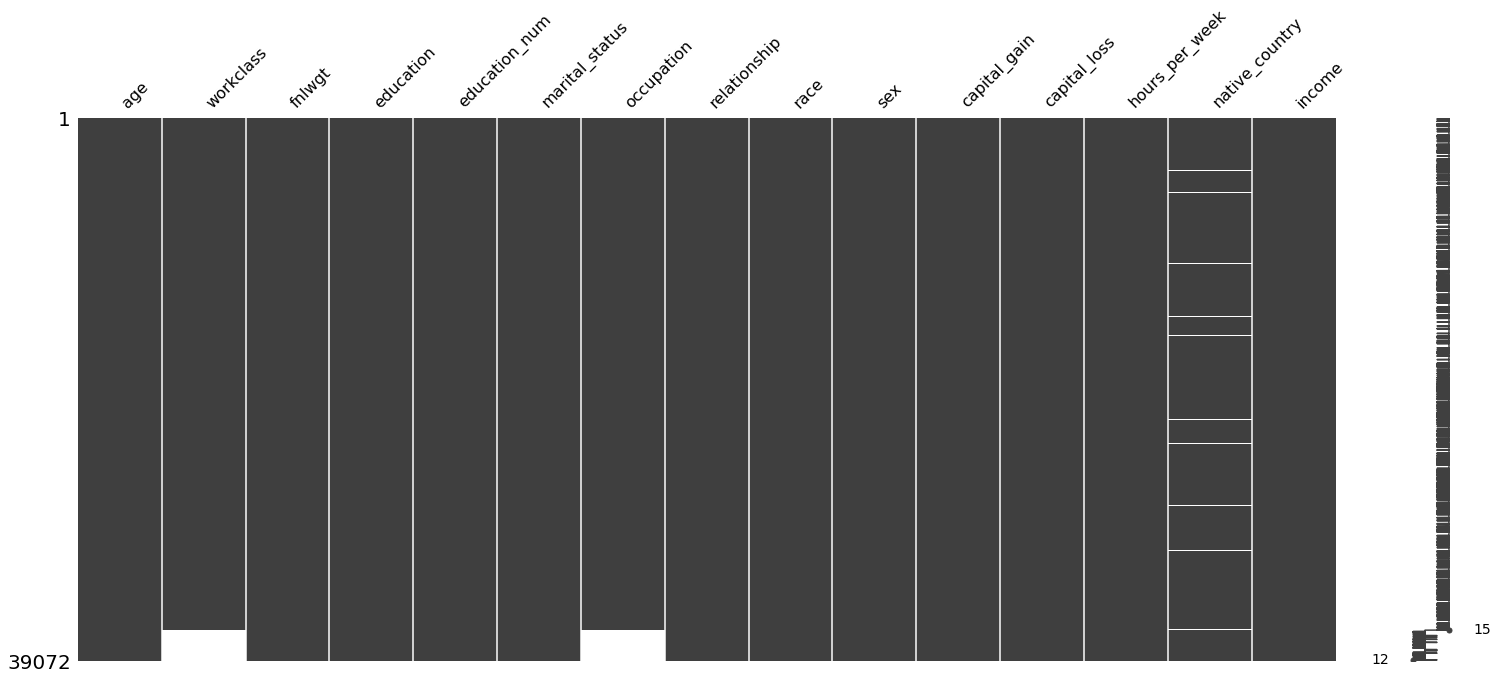

In [6]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('adult_combined_train_80.csv')

# Sort by the 'Occupation' column
sorted_df = df.sort_values('occupation')

# Show the missing data matrix
msno.matrix(sorted_df)
plt.show()

Shape: (39072, 15)
🔍 Displaying heatmap of missingness correlations...


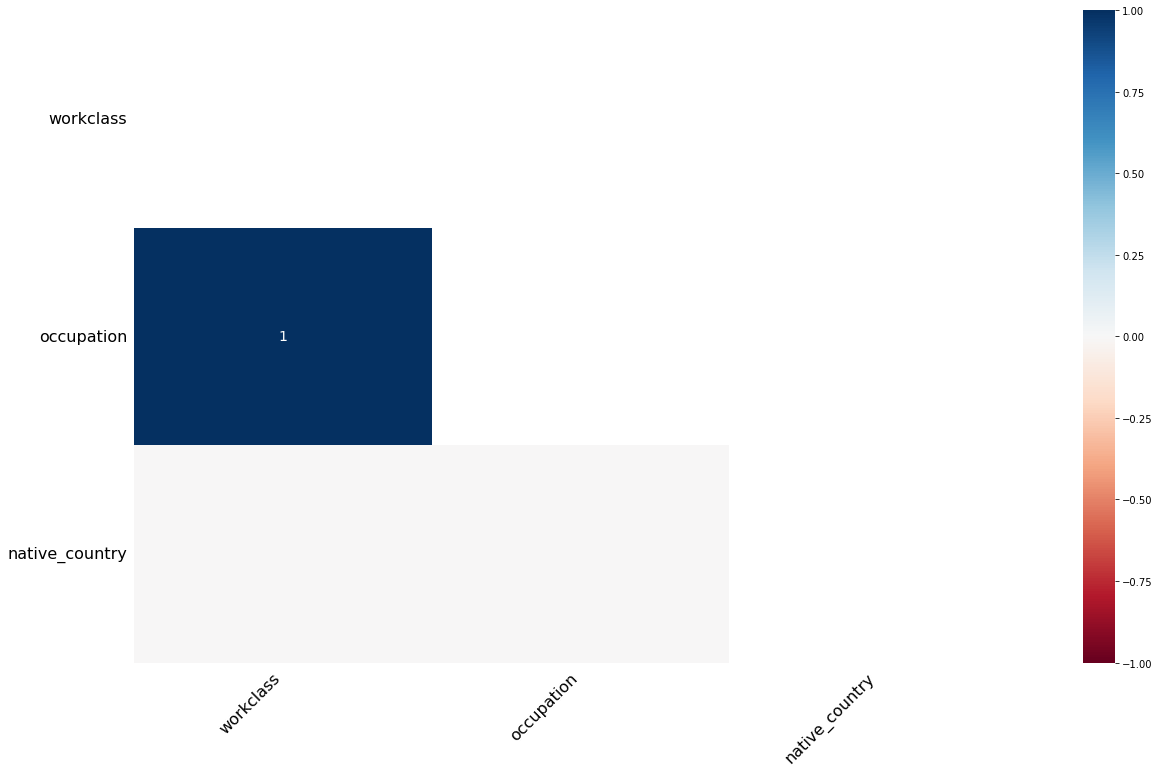

In [7]:
import pandas as pd
import missingno as msno  
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('adult_combined_train_80.csv')

# Optional: quick check of shape
print(f"Shape: {df.shape}")

# 1. Heatmap of missing value correlations
print("🔍 Displaying heatmap of missingness correlations...")
msno.heatmap(df)
plt.show()


Interprection of the Heatmap

| **Correlation Value** | **Interpretation**                                                                 |
|------------------------|-----------------------------------------------------------------------------------|
| **1.0**                | Perfect positive correlation: if one column is missing, the other is **always** missing too. |
| **0.0**                | No correlation: missingness in one column doesn't tell you anything about the other. |
| **-1.0**               | Perfect negative correlation (rare): if one is missing, the other is **never** missing. |


### 🔍 Missing Data Analysis: `occupation` and `workclass` Columns

Based on the **missing data heatmap** and **matrix plot**, we can conclude that the `occupation` and `workclass` columns are highly correlated in terms of their missingness:

- The heatmap shows a **perfect positive correlation (1.0)** between the two columns, meaning:
  > Whenever `occupation` is missing, `workclass` is also missing — and vice versa.
- This indicates a **strong dependency** between these two features in terms of how missing values occur.
- The matrix plot supports this, showing that the rows where `occupation` is missing align exactly with the rows where `workclass` is missing. These appear as horizontal white lines in both columns, perfectly synchronized.

## Drop Rows which contain NaN values in native_country column

ℹ️ Rows with missing values in `native_country` were dropped because, based on the missingness matrix and heatmap, they appeared to be isolated and not correlated with missingness in other columns.

In [8]:
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv('adult_combined_train_80.csv')
test_df = pd.read_csv('adult_combined_test_20.csv') 

# Drop rows with missing 'native_country' from both
train_cleaned = train_df.dropna(subset=['native_country'])
test_cleaned = test_df.dropna(subset=['native_country'])

# Print shapes before and after cleaning
print("🔍 Train dataset:")
print(f" - Original shape: {train_df.shape}")
print(f" - After dropna:   {train_cleaned.shape}")

print("\n🔍 Test dataset:")
print(f" - Original shape: {test_df.shape}")
print(f" - After dropna:   {test_cleaned.shape}")

# Optionally, save cleaned versions
train_cleaned.to_csv('adult_combined_train_80.csv', index=False)
test_cleaned.to_csv('adult_combined_test_20.csv', index=False)

🔍 Train dataset:
 - Original shape: (39072, 15)
 - After dropna:   (38379, 15)

🔍 Test dataset:
 - Original shape: (9769, 15)
 - After dropna:   (9605, 15)


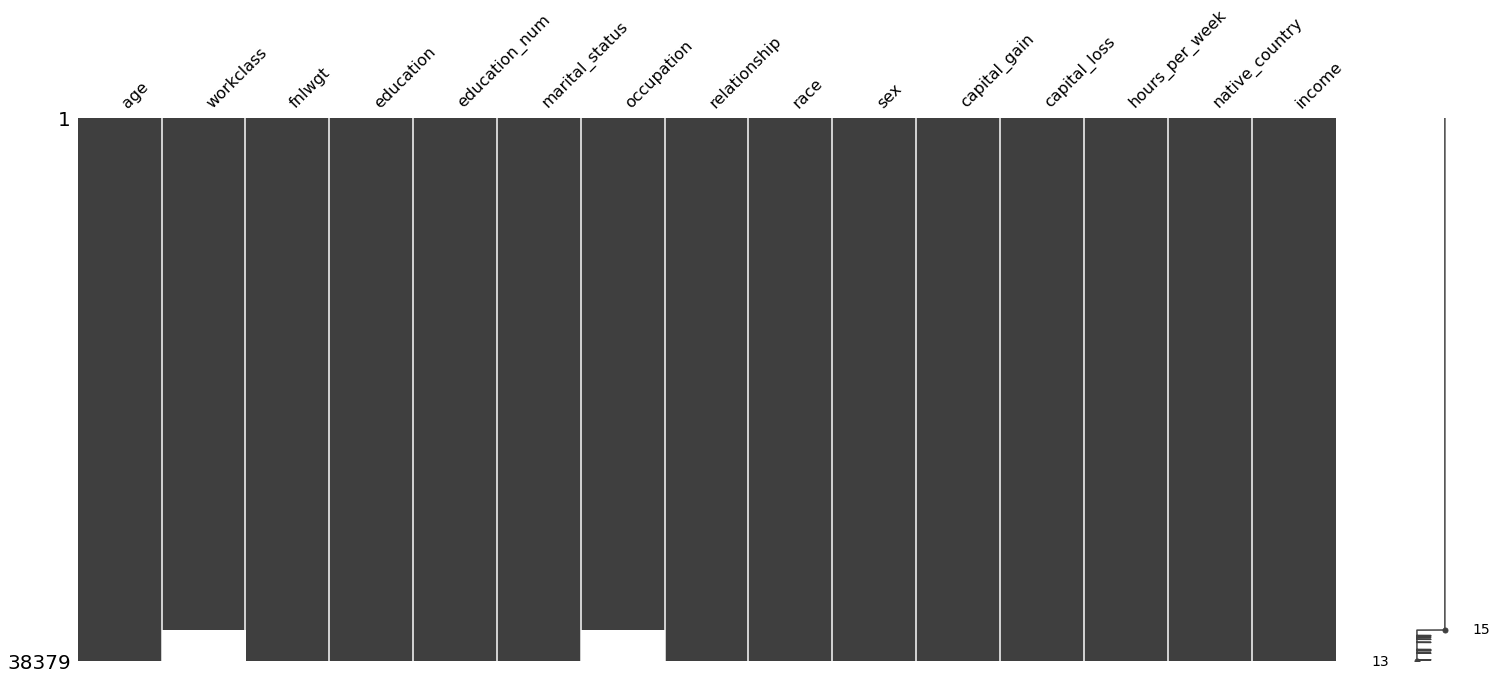

In [9]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('adult_combined_train_80.csv')

# Sort by the 'Occupation' column
sorted_df = df.sort_values('occupation')

# Show the missing data matrix
msno.matrix(sorted_df)
plt.show()